## Imports

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import nltk
nltk.download('all', download_dir=os.path.dirname(os.path.abspath('ml_model.ipynb')))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     s:\Data\Coding\SentimentAnalysis\ml...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     s:\Data\Coding\SentimentAnalysis\ml...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     s:\Data\Coding\SentimentAnalysis\ml...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     s:\Data\Coding\SentimentAnalysis\ml...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     s:\Data\Coding\SentimentAnalysis\ml...
[nltk_data]    |   Unzipping
[nltk_data]    |     

True

In [ ]:
nltk.data.path.append(os.path.dirname(os.path.abspath('ml_model.ipynb')))
nltk.data.path

['C:\\Users\\egorn/nltk_data',
 's:\\Data\\Coding\\SentimentAnalysis\\venv\\nltk_data',
 's:\\Data\\Coding\\SentimentAnalysis\\venv\\share\\nltk_data',
 's:\\Data\\Coding\\SentimentAnalysis\\venv\\lib\\nltk_data',
 'C:\\Users\\egorn\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data',
 's:\\Data\\Coding\\SentimentAnalysis\\ml']

## Read dataset

In [2]:
df = pd.read_csv('../data/Reviews.csv')
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [3]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [4]:
df.shape

(568454, 10)

In [5]:
df = df.head(10000)
df.shape

(10000, 10)

## Quick EDA

Text(0.5, 0, 'Review Stars')

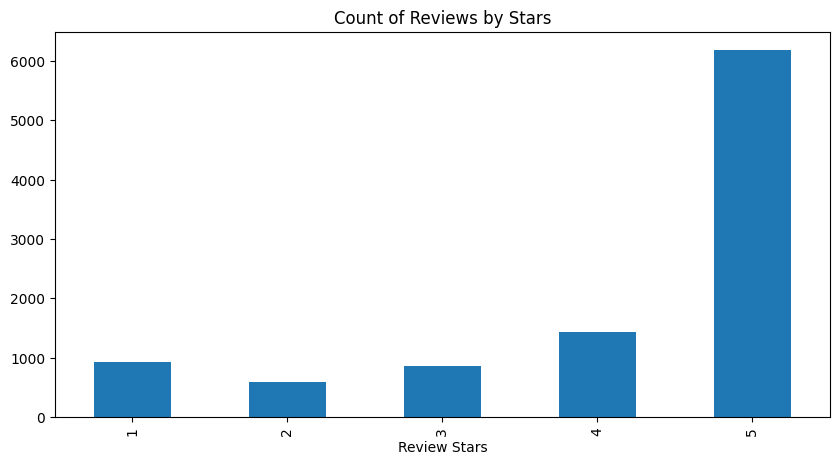

In [11]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')

## Basic NLTK

In [12]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [38]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [40]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [41]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

In [43]:
sia = SentimentIntensityAnalyzer()

In [44]:
sia.polarity_scores("I'm so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [45]:
sia.polarity_scores("This is the worst thing ever.")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [46]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [53]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)






















Exception ignored in: <function tqdm.__del__ at 0x0000029CBA85C720>
Traceback (most recent call last):
  File "s:\Data\Coding\SentimentAnalysis\venv\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "s:\Data\Coding\SentimentAnalysis\venv\Lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000029CBA85C720>
Traceback (most recent call last):
  File "s:\Data\Coding\SentimentAnalysis\venv\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "s:\Data\Coding\SentimentAnalysis\venv\Lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000029CBA85C720>
Traceback (most recent call last):


In [58]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [60]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

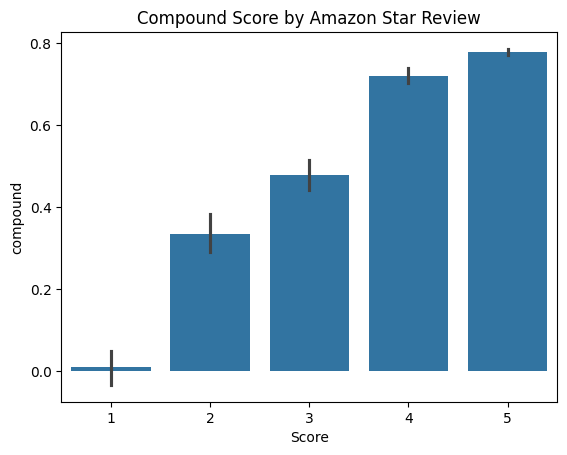

In [64]:
ax = sns.barplot(vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')

Text(0.5, 1.0, 'Negative')

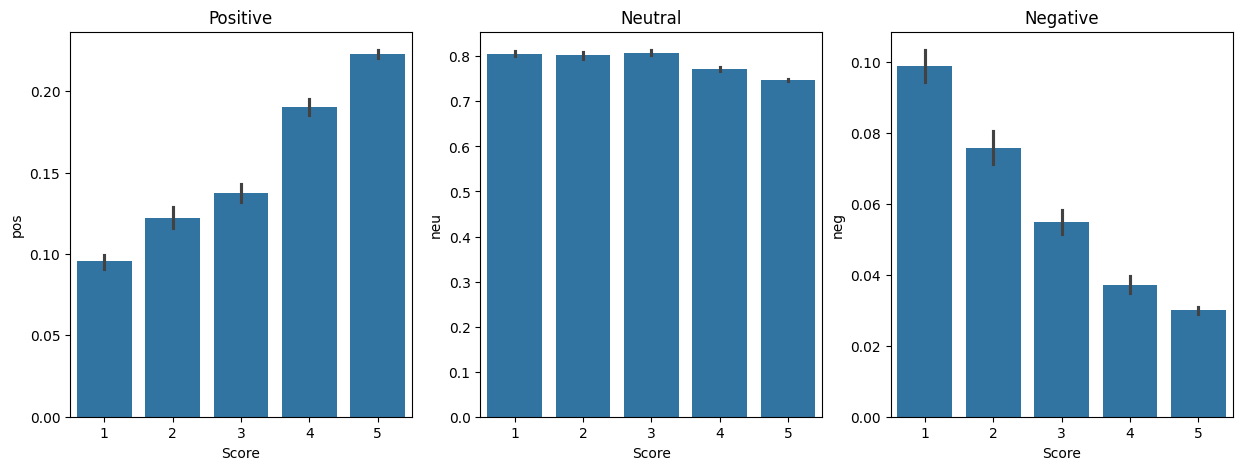

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

In [68]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [69]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

s:\Data\Coding\SentimentAnalysis\venv\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\egorn\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [74]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}
scores_dict

{'roberta_neg': np.float32(0.97635514),
 'roberta_neu': np.float32(0.020687465),
 'roberta_pos': np.float32(0.0029573678)}

In [76]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [78]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
        roberta_result = polarity_scores_roberta(text)
        res[myid] = {**vader_result_rename, **roberta_result}
    except RuntimeError:
        print(f'Broke for id {myid}')

  1%|          | 84/10000 [00:06<09:18, 17.77it/s]

Broke for id 83


  2%|▏         | 189/10000 [00:12<08:14, 19.84it/s]

Broke for id 187


  5%|▌         | 531/10000 [00:33<09:52, 15.97it/s]

Broke for id 529


  5%|▌         | 542/10000 [00:34<07:52, 20.01it/s]

Broke for id 540


  7%|▋         | 747/10000 [00:48<11:03, 13.95it/s]

Broke for id 746


  9%|▊         | 864/10000 [00:55<08:27, 18.00it/s]

Broke for id 863


 11%|█         | 1054/10000 [01:07<08:20, 17.89it/s]

Broke for id 1053


 11%|█         | 1074/10000 [01:09<07:23, 20.11it/s]

Broke for id 1070


 12%|█▏        | 1159/10000 [01:14<06:59, 21.07it/s]

Broke for id 1156


 13%|█▎        | 1324/10000 [01:23<08:02, 17.99it/s]

Broke for id 1321


 14%|█▍        | 1377/10000 [01:26<10:11, 14.11it/s]

Broke for id 1375


 15%|█▍        | 1499/10000 [01:34<08:50, 16.02it/s]

Broke for id 1498


 16%|█▌        | 1576/10000 [01:39<10:24, 13.50it/s]

Broke for id 1575


 18%|█▊        | 1800/10000 [01:53<05:41, 24.01it/s]

Broke for id 1796


 18%|█▊        | 1828/10000 [01:54<08:29, 16.03it/s]

Broke for id 1826


 22%|██▏       | 2171/10000 [02:17<10:19, 12.64it/s]

Broke for id 2169


 22%|██▏       | 2249/10000 [02:22<06:58, 18.54it/s]

Broke for id 2248


 25%|██▍       | 2477/10000 [02:36<07:28, 16.78it/s]

Broke for id 2476


 25%|██▍       | 2494/10000 [02:38<07:57, 15.73it/s]

Broke for id 2492


 26%|██▌       | 2587/10000 [02:44<06:36, 18.70it/s]

Broke for id 2584


 26%|██▌       | 2611/10000 [02:45<07:55, 15.53it/s]

Broke for id 2610


 29%|██▉       | 2901/10000 [03:03<05:33, 21.29it/s]

Broke for id 2897
Broke for id 2898
Broke for id 2902


 29%|██▉       | 2930/10000 [03:04<07:12, 16.35it/s]

Broke for id 2928


 29%|██▉       | 2945/10000 [03:05<07:59, 14.72it/s]

Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948


 30%|███       | 3024/10000 [03:10<06:07, 18.97it/s]

Broke for id 3022
Broke for id 3023
Broke for id 3025


 33%|███▎      | 3306/10000 [03:27<05:18, 21.03it/s]

Broke for id 3306


 38%|███▊      | 3790/10000 [03:56<05:11, 19.94it/s]

Broke for id 3788


 40%|███▉      | 3971/10000 [04:06<05:49, 17.24it/s]

Broke for id 3969


 41%|████      | 4109/10000 [04:15<05:41, 17.26it/s]

Broke for id 4107
Broke for id 4110


 43%|████▎     | 4308/10000 [04:28<05:49, 16.30it/s]

Broke for id 4307


 43%|████▎     | 4320/10000 [04:28<05:58, 15.87it/s]

Broke for id 4316


 44%|████▍     | 4411/10000 [04:34<04:16, 21.82it/s]

Broke for id 4408


 45%|████▍     | 4486/10000 [04:38<04:09, 22.10it/s]

Broke for id 4483


 45%|████▌     | 4513/10000 [04:40<05:40, 16.12it/s]

Broke for id 4512


 46%|████▌     | 4554/10000 [04:43<05:55, 15.32it/s]

Broke for id 4553


 46%|████▌     | 4584/10000 [04:46<08:46, 10.28it/s]

Broke for id 4583


 50%|█████     | 5044/10000 [05:16<04:09, 19.87it/s]

Broke for id 5040


 52%|█████▏    | 5185/10000 [05:24<04:18, 18.61it/s]

Broke for id 5182


 52%|█████▏    | 5194/10000 [05:25<06:30, 12.31it/s]

Broke for id 5192


 54%|█████▎    | 5369/10000 [05:35<03:47, 20.31it/s]

Broke for id 5365


 54%|█████▍    | 5443/10000 [05:41<04:53, 15.53it/s]

Broke for id 5442


 57%|█████▋    | 5710/10000 [05:58<03:45, 19.03it/s]

Broke for id 5709


 60%|█████▉    | 5999/10000 [06:16<03:06, 21.50it/s]

Broke for id 5998


 60%|██████    | 6005/10000 [06:16<03:37, 18.37it/s]

Broke for id 6003


 60%|██████    | 6010/10000 [06:17<04:02, 16.46it/s]

Broke for id 6007


 61%|██████    | 6109/10000 [06:23<03:22, 19.17it/s]

Broke for id 6106


 62%|██████▏   | 6237/10000 [06:31<03:43, 16.84it/s]

Broke for id 6234


 66%|██████▌   | 6560/10000 [06:51<03:22, 17.00it/s]

Broke for id 6558


 67%|██████▋   | 6652/10000 [06:57<05:16, 10.56it/s]

Broke for id 6651


 68%|██████▊   | 6801/10000 [07:10<03:41, 14.46it/s]

Broke for id 6798


 68%|██████▊   | 6838/10000 [07:13<04:00, 13.16it/s]

Broke for id 6838


 68%|██████▊   | 6849/10000 [07:14<05:13, 10.05it/s]

Broke for id 6850


 69%|██████▉   | 6889/10000 [07:17<02:49, 18.30it/s]

Broke for id 6886


 69%|██████▉   | 6907/10000 [07:18<04:14, 12.14it/s]

Broke for id 6905


 70%|██████▉   | 6956/10000 [07:22<03:16, 15.46it/s]

Broke for id 6955


 71%|███████   | 7079/10000 [07:30<03:11, 15.26it/s]

Broke for id 7077


 71%|███████   | 7089/10000 [07:30<03:03, 15.89it/s]

Broke for id 7088


 72%|███████▏  | 7203/10000 [07:37<02:23, 19.45it/s]

Broke for id 7201


 76%|███████▌  | 7606/10000 [08:01<02:11, 18.16it/s]

Broke for id 7604
Broke for id 7608


 77%|███████▋  | 7673/10000 [08:05<02:12, 17.58it/s]

Broke for id 7671


 77%|███████▋  | 7704/10000 [08:08<02:38, 14.49it/s]

Broke for id 7701


 78%|███████▊  | 7813/10000 [08:15<02:03, 17.66it/s]

Broke for id 7810


 79%|███████▉  | 7910/10000 [08:21<02:25, 14.33it/s]

Broke for id 7907


 81%|████████  | 8080/10000 [08:32<01:45, 18.21it/s]

Broke for id 8077


 81%|████████▏ | 8133/10000 [08:35<01:24, 22.02it/s]

Broke for id 8131


 83%|████████▎ | 8268/10000 [08:43<01:36, 17.95it/s]

Broke for id 8266


 87%|████████▋ | 8740/10000 [09:11<01:09, 18.20it/s]

Broke for id 8740


 88%|████████▊ | 8760/10000 [09:13<01:11, 17.45it/s]

Broke for id 8757


 89%|████████▉ | 8939/10000 [09:24<00:47, 22.47it/s]

Broke for id 8935


 96%|█████████▌| 9592/10000 [10:01<00:26, 15.53it/s]

Broke for id 9590


 99%|█████████▊| 9853/10000 [10:19<00:09, 14.84it/s]

Broke for id 9850


 99%|█████████▉| 9883/10000 [10:21<00:06, 19.36it/s]

Broke for id 9881


 99%|█████████▉| 9912/10000 [10:23<00:06, 13.86it/s]

Broke for id 9910


 99%|█████████▉| 9925/10000 [10:24<00:05, 13.53it/s]

Broke for id 9923


100%|██████████| 10000/10000 [10:29<00:00, 15.89it/s]


In [79]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [80]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

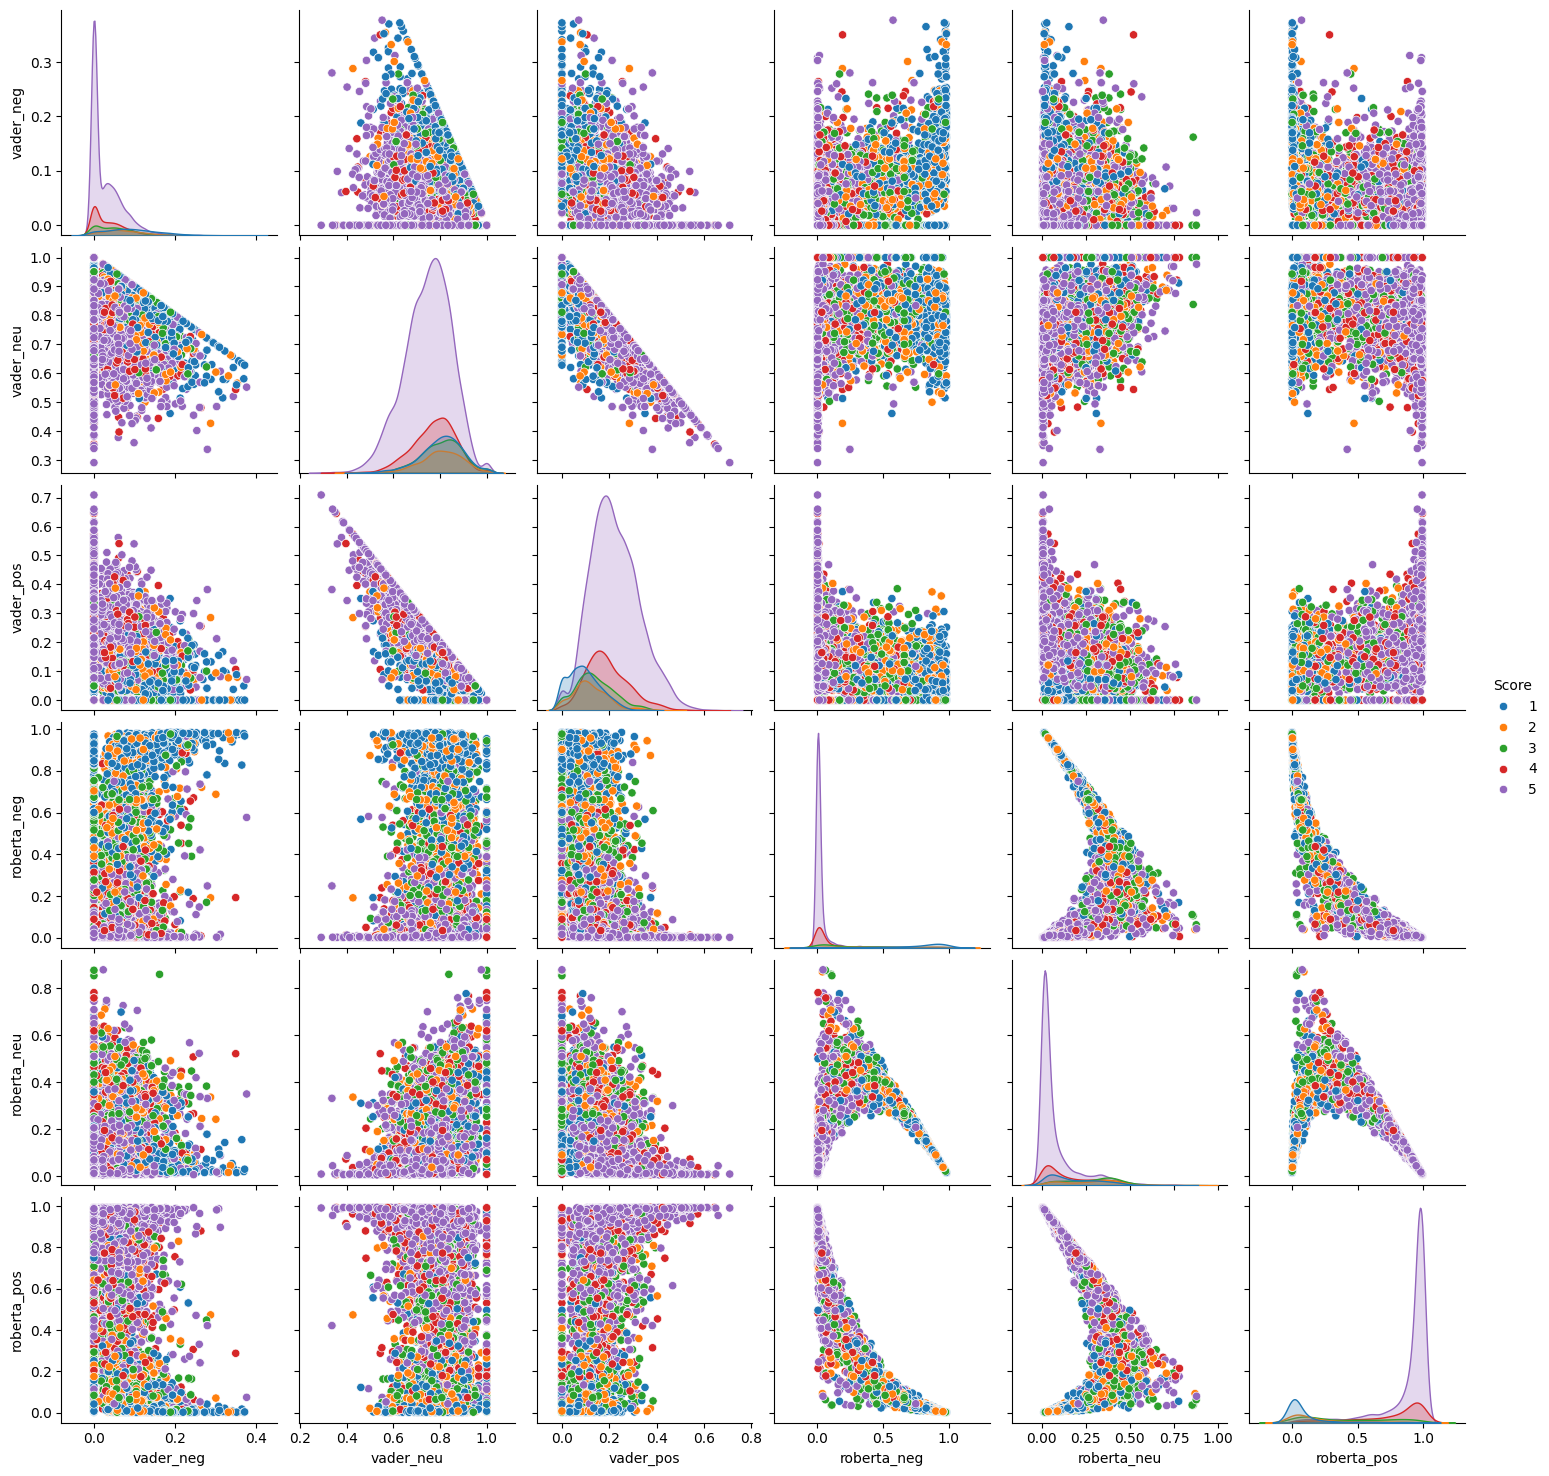

In [81]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()